# Acquire and Prep - Wrangle

In the following lessons, we will walk through the data science pipeline using the following scenario:

I'm a university teacher, and I want to know when to worry about a student's progress.  I want to be able to work with any students who are at high risk of failing the class, so that I can try to prevent that from happening.  I have the grades of the three exams and the final grade from last semester's class.  I'm hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Acquire the Data

Let's use pandas to read our csv into a pandas DataFrame.

In [2]:
# Read csv file into pandas DataFrame.
df = pd.read_csv('student_grades.csv')


### Sample and Summarize

Let's take a look at the DataFrame we brought in and document our initial findings.

In [6]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [10]:
# 104 rows and 5 columns coming in.

df.shape

(104, 5)

In [9]:
# Display readable summary statistics for numeric columns. Why isn't exam3 showing up?

df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [11]:
# Running .info() shows us that the exam3 column is not a numeric data type; it's an object.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


#### Acquire and Summarize Takeaways

- Missing value in exam1.
- Exam data types are reading in differently. Why?
- Take a look at the exam3 column with the object data type.
- Only seem to be missing a small amount of data; we might just drop those observations.
- Why is exam1 reading in as a float; do we need that?
- Would we want to do anything with student_id?

___

## Prepare the Data

### Finding Null Values

Let's check out some other ways to find Null values when you are dealing with a larger dataframe, especially one with more attributes and more missing values.

- np.nan values have a float data type. When a column you expect to have an integer data type reads in as a float, this may be signaling that there is one or more Null values present.

#### `.isnull().sum()`

In [12]:
# Find the total number of Null values in each column of our DataFrame.

df.isnull().sum()
# df.isnull().sum(axis=1) shows row sums.


student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

#### `.isnull().any()`

In [13]:
# Check for any Null values in each column of our DataFrame.

df.isnull().any()

student_id     False
exam1           True
exam2          False
exam3          False
final_grade    False
dtype: bool

In [18]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]
# df[df['exam1'].isnull()] Pulls entry.

Index(['exam1'], dtype='object')

### Finding Odd Values

Let's find the odd value in `exam3` that is causing this numeric column to be coerced into an object data type.

In [20]:
# Check out the values and their frequencies from exam3 column.
df.exam3.nunique()
df.exam3.unique()

#df.exam3.value_counts(ascending=True) Pulls up least common values.

array(['95', '96', '87', '86', '85', '94', '75', '78', '79', '70', ' '],
      dtype=object)

In [23]:
df[df.exam3 == ' ']

,student_id,exam1,exam2,exam3,final_grade
11,12,57.0,65,,65


In [26]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.
# using Regex
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# regex mini crash course for very smols:
# ^ == starting with
# $ == ending with
# \s == any whitespace
# * == zero or more times

Verify that our empty string has been replaced by a null

In [27]:
# Now .info() shows us that exam3 has a Null value instead of a whitespace disguised as a non-null value.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


### Drop Null Values

Let's drop observations that have any Null values; in this case, we have so few that we can simply drop rows instead of imputing values to save observations.

In [32]:
# Drop all rows with any Null values, assign to df, and verify.
df.dropna().info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    object 
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


### Convert Data Types

Let's convert any data types we need to at this point.

In [33]:
# Change all column data tyes to int64, reassign to df, and verify.

df.astype(int).info()
df = df.astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


You may want to fill your missing values with a value instead of dropping the rows. One way to do this is to apply the `.fillna()` method to your dataframe. 
```python
# Default arguments for value and method parameters.

df.fillna(value=None, method=None)
```

When running `.describe()`, we should now see `exam3` listed since we have converted it to a numeric type.

In [34]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


___

## Visualize Distributions

We can plot histograms and/or boxplots to see the distributions of single variables and check for skewness, outliers, and unit scales. *Note, we don't have to split our data before exploring single variables. We DO have to split our data before performing bi- and multi-variate exploration.*

#### `sns.displot()`

We can use Seaborn's `displot` to display the binned values from a column.

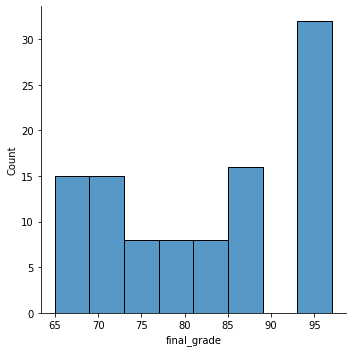

In [39]:
# The default is bins=10.

sns.displot(data=df, x ='final_grade')

#### `plt.subplot()` & `.hist()`

Here we'll loop through each of the numeric columns of interest and show the distribution of each on a separate subplot.

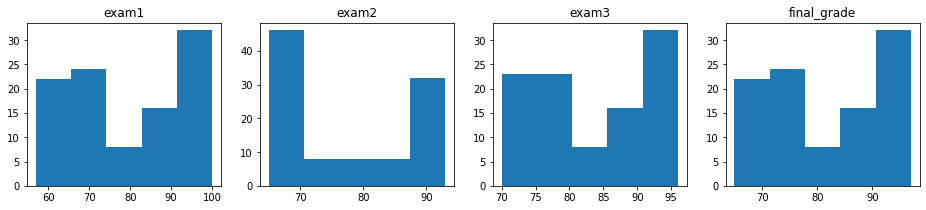

In [37]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

#### `sns.boxplot()`

Seaborn's `.boxplot` will default to plotting *all* the numeric variables if we don't specify specific x and y values. 

<AxesSubplot:>

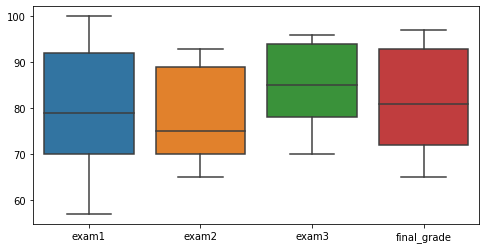

In [38]:
# We don't want to plot the `student_id` column.

plt.figure(figsize=(8,4))

# Create boxplots for all but student_id.
sns.boxplot(data = df.drop(columns='student_id'))

#### Distribution Takeaways

- Exam2 doesn't look to be super helpful in predicting final_grade.
- Exam3 has the highest median and Exam2 has the lowest median score.
- Exam1 has the largest range in scores.
- All numeric columns are bimodal distributions, no normal.

___

## Pipeline Function

We finalize these data wrangling steps (acquire and prepare) by writing a function that will reproduce the DataFrame with the necessary changes.

In [40]:
def wrangle_grades():
    '''
    Read student_grades csv file into a pandas DataFrame,
    drop student_id column, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned student grades DataFrame.
    '''
    # Acquire data from csv file.
    df = pd.read_csv('student_grades.csv')
    # Replace white space values with NaN values.
    df = df.replace(r'^\s*$', np.nan, regex=True)
    # Drop all rows with NaN values.
    df = df.dropna()
    # Convert all columns to int64 data types.
    df = df.astype(int)
    return df


In [41]:
# Let's test out or wrangle function from above.

df_test = wrangle_grades()

In [42]:
df_test.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


___